# North American Industry Classification System (NAICS) Time Series Analysis

The North American Industry Classification System (NAICS) is an industry classification system developed by the
statistical agencies of Canada, Mexico and the United States. Created against the background of the North
American Free Trade Agreement, it is designed to provide common definitions of the industrial structure of the three
countries and a common statistical framework to facilitate the analysis of the three economies. NAICS is based on
supply-side or production-oriented principles, to ensure that industrial data, classified to NAICS, are suitable for the
analysis of production-related issues such as industrial performance

Description of the North American Industry
Classification System (NAICS). All you would need to understand for this task is, how the
NAICS works as a hierarchical structure for defining industries at different levels of
aggregation. For example (see page 22), a 2-digit NAICS industry (e.g., 23 - Construction) is
composed of some 3-digit NAICS industries (236 - Construction of buildings, 237 - Heavy
and civil engineering construction, and a few more 3-digit NAICS industries).
Similarly, a 3-digit NAICS industry (e.g., 236 - Construction of buildings), is composed of
4-digit NAICS industries (2361 - Residential building construction and 2362 -
Non-residential building construction).

15 CSV files beginning with RTRA. These files contain employment data by
industry at different levels of aggregation; 2-digit NAICS, 3-digit NAICS, and 4-digit
NAICS. Columns mean as follows:
1. SYEAR: Survey Year
2. SMTH: Survey Month
3. NAICS: Industry name and associated NAICS code in the bracket
4. _EMPLOYMENT_: Number of Employment associated in the specified industry.

Each level of aggregation (i.e.2-digit NAICS, 3-digit NAICS, and 4-digit NAICS) has survey data from 1997 to 2020 segregated into 1997-1999, 2000-2005, 2006-2010, 2011-2015 and 2016-2020.
This analysis will be done on industries between 1997 to 2018.




## Importing Libraries.

In [84]:
#importing necessary libaries under their alias
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Importing And Exploring Dataset From Local Files

In [85]:
# read the data output template and assigning it to the variable output. We parse the columns SYEAR AND SMITH as datetime objects and assignd to a new colume name DATE
output= pd.read_excel('Data_Output_Template.xlsx', parse_dates={'DATE':['SYEAR','SMTH']})
print(output.nunique()) # print the number o unique values
print(output.shape) # print the shape the number of rows and colums
output.info()   # print the summary of information dataset such as datatypes, column names etc
output

DATE                     264
LMO_Detailed_Industry     59
Employment                 0
dtype: int64
(15576, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15576 entries, 0 to 15575
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   DATE                   15576 non-null  datetime64[ns]
 1   LMO_Detailed_Industry  15576 non-null  object        
 2   Employment             0 non-null      float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 365.2+ KB


,DATE,LMO_Detailed_Industry,Employment
0,1997-01-01,Accommodation services,NaN
1,1997-01-01,Air transportation,NaN
2,1997-01-01,Ambulatory health care services,NaN
3,1997-01-01,"Amusement, gambling and recreation industries",NaN
4,1997-01-01,"Architectural, engineering and related services",NaN
...,...,...,...
15571,2018-12-01,Utilities,NaN
15572,2018-12-01,Warehousing and storage,NaN
15573,2018-12-01,Water transportation,NaN
15574,2018-12-01,Wholesale trade,NaN


In [86]:
# read the LMO Detailed Industries by NAICS file
lmo= pd.read_excel('LMO_Detailed_Industries_by_NAICS.xlsx')
print(lmo.shape)
print(lmo.head())
print(lmo.info())

(59, 2)
                             LMO_Detailed_Industry      NAICS
0                                            Farms  111 & 112
1                    Fishing, hunting and trapping        114
2                             Forestry and logging        113
3  Support activities for agriculture and forestry        115
4                           Oil and gas extraction        211
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   LMO_Detailed_Industry  59 non-null     object
 1   NAICS                  59 non-null     object
dtypes: object(2)
memory usage: 1.0+ KB
None


In [87]:
# Cleaning the lmo dataset
lmo['NAICS']=lmo['NAICS'].astype('str').str.replace('&',',').str.split(',') # replaces & with comma and splits the row into a list
lmo= lmo.explode('NAICS') # Transform each element of a list-like to a row, replicating index values
lmo['NAICS']=lmo.NAICS.str.strip() # remove leading or trailing whitespaces in the NAICS values and make them uniform.
lmo.info() 
lmo.tail(10) # Display last 10 rows

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107 entries, 0 to 58
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   LMO_Detailed_Industry  107 non-null    object
 1   NAICS                  107 non-null    object
dtypes: object(2)
memory usage: 2.5+ KB


,LMO_Detailed_Industry,NAICS
51,"Amusement, gambling and recreation industries",713
52,Heritage institutions,712
53,Accommodation services,721
54,Food services and drinking places,722
55,"Repair, personal and non-profit services",81
56,Federal government public administration,911
57,Provincial and territorial public administration,912
58,Local and Indigenous public administration,913
58,Local and Indigenous public administration,914
58,Local and Indigenous public administration,919


#### Load And Merge CSV files 
Define A Function That Loads And Merges the CSV files according to their industry aggregates. First Create a list of all CSV files in terms of industry aggregates.

In [88]:
data2_files=['RTRA_Employ_2NAICS_97_99.csv',
             'RTRA_Employ_2NAICS_00_05.csv',
             'RTRA_Employ_2NAICS_06_10.csv',
             'RTRA_Employ_2NAICS_11_15.csv',
             'RTRA_Employ_2NAICS_16_20.csv']

data3_files=['RTRA_Employ_3NAICS_97_99.csv',
             'RTRA_Employ_3NAICS_00_05.csv',
             'RTRA_Employ_3NAICS_06_10.csv'
             ,
             'RTRA_Employ_3NAICS_11_15.csv',
             'RTRA_Employ_3NAICS_16_20.csv']

data4_files=['RTRA_Employ_4NAICS_97_99.csv',
             'RTRA_Employ_4NAICS_00_05.csv',
             'RTRA_Employ_4NAICS_06_10.csv',
             'RTRA_Employ_4NAICS_11_15.csv',
             'RTRA_Employ_4NAICS_16_20.csv']

def merge_csv_files(files):
    """  Loads and merges the list of csv files into a single dataframe, parses the year and month column 
        as a new datetime object column and subsets dates from 1997 to 2018
         Args:
              list of local CSV file names.
          Returns:
          A merged dataframe
    """
    a=[pd.read_csv(file, parse_dates={'DATE':['SYEAR','SMTH']}) for file in files ] # a for loop list comprehension to read the datasets
    df=pd.concat(a, ignore_index =True) # concatenate the loaded files
    df= df[(df['DATE'] <'2019')] # subsets dates less than the year 2019
    return df

### Two Digit Industries

In [89]:
# apply the merged_csv_files on the 2 digit industries files
data_2=merge_csv_files(data2_files)
print(data_2.shape)
print(data_2.head())
print(data_2.describe())
print(data_2.info())

(5244, 3)
        DATE                                              NAICS  _EMPLOYMENT_
0 1997-01-01               Accommodation and food services [72]        129250
1 1997-01-01  Administrative and support, waste management a...         58500
2 1997-01-01    Agriculture, forestry, fishing and hunting [11]         62250
3 1997-01-01            Arts, entertainment and recreation [71]         38750
4 1997-01-01                                  Construction [23]        118000
        _EMPLOYMENT_
count    5244.000000
mean   108044.574752
std     73417.408347
min         0.000000
25%     52750.000000
50%     93750.000000
75%    161500.000000
max    329000.000000
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5244 entries, 0 to 5243
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   DATE          5244 non-null   datetime64[ns]
 1   NAICS         5244 non-null   object        
 2   _EMPLOYMENT_  5244 non

In [90]:
# Separate industry description from industry code
df1 = pd.DataFrame(data_2['NAICS'].str.split('[').tolist(), columns=["NAICS_name", "CODE"]) # subset the  digit dataset NAICS column and split into a list with two new  columns
df2 =pd.DataFrame(df1["CODE"].astype(str).str.replace(']', '', regex= True).str.split('-')) 
data_2['NAICS']= df2
data_2


,DATE,NAICS,_EMPLOYMENT_
0,1997-01-01,[72],129250
1,1997-01-01,[56],58500
2,1997-01-01,[11],62250
3,1997-01-01,[71],38750
4,1997-01-01,[23],118000
...,...,...,...
5239,2018-12-01,[53],51750
5240,2018-12-01,"[44, 45]",282500
5241,2018-12-01,"[48, 49]",136250
5242,2018-12-01,[22],12250


In [91]:
# Using the pandas explode method to transform each element of a list-like to a row while replicating their index values
data_2=data_2.explode('NAICS')
print(data_2.shape)
data_2.info()

(6036, 3)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6036 entries, 0 to 5243
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   DATE          6036 non-null   datetime64[ns]
 1   NAICS         6036 non-null   object        
 2   _EMPLOYMENT_  6036 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 188.6+ KB


##### Merge the lmo industry details to the 2 digit industry dataset since they both share the NAICS columns in common

In [92]:
# merge and assign the result to a new varible
dat2=lmo.merge(data_2,on='NAICS', how='right').reset_index(drop= True)
print(dat2)
dat2.info()

                              LMO_Detailed_Industry NAICS       DATE  \
0                                               NaN    72 1997-01-01   
1     Business, building and other support services    56 1997-01-01   
2                                               NaN    11 1997-01-01   
3                                               NaN    71 1997-01-01   
4                                      Construction    23 1997-01-01   
...                                             ...   ...        ...   
6031                                            NaN    45 2018-12-01   
6032                                            NaN    48 2018-12-01   
6033                                            NaN    49 2018-12-01   
6034                                      Utilities    22 2018-12-01   
6035                                Wholesale trade    41 2018-12-01   

      _EMPLOYMENT_  
0           129250  
1            58500  
2            62250  
3            38750  
4           118000  
...      

### Three Digit Industries

In [93]:
# apply the merged_csv_files on the 3 digit industries files
data_3= merge_csv_files(data3_files)
print(data_3.shape)
print(data_3.head())
print(data_3.describe()) # prints descriptive statistics about the dataset
print(data_3.info())
data_3

(26928, 3)
        DATE                                     NAICS  _EMPLOYMENT_
0 1997-01-01     Aboriginal public administration[914]           500
1 1997-01-01               Accommodation services[721]         24000
2 1997-01-01  Administrative and support services[561]         56750
3 1997-01-01                   Air transportation[481]         17000
4 1997-01-01      Ambulatory health care services[621]         40000
        _EMPLOYMENT_
count   26928.000000
mean    21040.766117
std     29739.079898
min         0.000000
25%      4750.000000
50%     11000.000000
75%     25000.000000
max    219000.000000
<class 'pandas.core.frame.DataFrame'>
Int64Index: 26928 entries, 0 to 26927
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   DATE          26928 non-null  datetime64[ns]
 1   NAICS         26928 non-null  object        
 2   _EMPLOYMENT_  26928 non-null  int64         
dtypes: datetime64[ns](1), i

,DATE,NAICS,_EMPLOYMENT_
0,1997-01-01,Aboriginal public administration[914],500
1,1997-01-01,Accommodation services[721],24000
2,1997-01-01,Administrative and support services[561],56750
3,1997-01-01,Air transportation[481],17000
4,1997-01-01,Ambulatory health care services[621],40000
...,...,...,...
26923,2018-12-01,Utilities[221],12000
26924,2018-12-01,Warehousing and storage[493],8750
26925,2018-12-01,Waste management and remediation services[562],9000
26926,2018-12-01,Water transportation[483],5000


In [94]:
#Separating the industry name from industry code
df3 = pd.DataFrame(data_3['NAICS'].str.split('[').tolist(), columns=["NAICS_name", "CODE"])
df3 =pd.DataFrame(df3["CODE"].astype('str').str.replace(']','', regex=True))
data_3['NAICS']= df3
data_3['NAICS']= data_3.NAICS.str.strip()
data_3.info()
data_3.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26928 entries, 0 to 26927
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   DATE          26928 non-null  datetime64[ns]
 1   NAICS         26928 non-null  object        
 2   _EMPLOYMENT_  26928 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 841.5+ KB


,DATE,NAICS,_EMPLOYMENT_
0,1997-01-01,914,500
1,1997-01-01,721,24000
2,1997-01-01,561,56750
3,1997-01-01,481,17000
4,1997-01-01,621,40000


##### Merge the lmo industry details to the 3 digit industry dataset since they both share the NAICS columns in common

In [95]:
# merge and assign the result to a new varible
dat3=lmo.merge(data_3, on='NAICS', how='right').reset_index(drop=True)
print(dat3.nunique())
dat3.info()
dat3

LMO_Detailed_Industry     43
NAICS                    102
DATE                     264
_EMPLOYMENT_             746
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27192 entries, 0 to 27191
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   LMO_Detailed_Industry  19836 non-null  object        
 1   NAICS                  27192 non-null  object        
 2   DATE                   27192 non-null  datetime64[ns]
 3   _EMPLOYMENT_           27192 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 849.9+ KB


,LMO_Detailed_Industry,NAICS,DATE,_EMPLOYMENT_
0,Local and Indigenous public administration,914,1997-01-01,500
1,Accommodation services,721,1997-01-01,24000
2,NaN,561,1997-01-01,56750
3,Air transportation,481,1997-01-01,17000
4,Ambulatory health care services,621,1997-01-01,40000
...,...,...,...,...
27187,NaN,221,2018-12-01,12000
27188,Warehousing and storage,493,2018-12-01,8750
27189,NaN,562,2018-12-01,9000
27190,Water transportation,483,2018-12-01,5000


### Four Digit Industries

In [96]:
# apply the merged_csv_files on the 4 digit industries files
data_4=merge_csv_files(data4_files)
print(data_4.shape)
print(data_4.head())
print(data_4.describe())
data_4.info()

(81876, 3)
        DATE  NAICS  _EMPLOYMENT_
0 1997-01-01   1100          3500
1 1997-01-01   1111           250
2 1997-01-01   1112           500
3 1997-01-01   1113          2250
4 1997-01-01   1114          5250
              NAICS   _EMPLOYMENT_
count  81876.000000   81876.000000
mean    4442.924813    6920.046778
std     1765.730560   12738.720881
min     1100.000000       0.000000
25%     3272.000000     750.000000
50%     4431.000000    2500.000000
75%     5323.000000    7500.000000
max     9191.000000  159000.000000
<class 'pandas.core.frame.DataFrame'>
Int64Index: 81876 entries, 0 to 81875
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   DATE          81876 non-null  datetime64[ns]
 1   NAICS         81876 non-null  int64         
 2   _EMPLOYMENT_  81876 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 2.5 MB


#### Merge the lmo industry details to the 2 digit industry dataset since they both share the NAICS columns in common

In [97]:
data_4['NAICS'] = data_4['NAICS'].astype('str') # change the data type of NAICS column to a string in order to merge on lmo datasets.
dat4=lmo.merge(data_4,on='NAICS',how='right').reset_index(drop=True)
print(dat4.nunique())
dat4.info()

LMO_Detailed_Industry     10
NAICS                    314
DATE                     264
_EMPLOYMENT_             545
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81876 entries, 0 to 81875
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   LMO_Detailed_Industry  6072 non-null   object        
 1   NAICS                  81876 non-null  object        
 2   DATE                   81876 non-null  datetime64[ns]
 3   _EMPLOYMENT_           81876 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 2.5+ MB


### Combine Industries


In [98]:
# merge all three industy datasets by concatenating them.
combined_industries=pd.concat([dat2,dat3,dat4], ignore_index= True)
combined_industries.info()
combined_industries.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115104 entries, 0 to 115103
Data columns (total 4 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   LMO_Detailed_Industry  27720 non-null   object        
 1   NAICS                  115104 non-null  object        
 2   DATE                   115104 non-null  datetime64[ns]
 3   _EMPLOYMENT_           115104 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 3.5+ MB


LMO_Detailed_Industry      59
NAICS                     439
DATE                      264
_EMPLOYMENT_             1122
dtype: int64

######  Drop null rows and duplicates.
After dropping the null values and duplicates we realize that the combined industries dataset has the exact same information and total  number of unique values as our output dataset. 

In [99]:
combined_industries.dropna(inplace=True) # drop all null rows without reassignment
combined_industries.drop_duplicates(subset=['DATE','LMO_Detailed_Industry'], inplace = True, ignore_index=True) # drop duplicates of DATE and LMO details columns
print(combined_industries.nunique())
combined_industries.info()
combined_industries.head()

LMO_Detailed_Industry     59
NAICS                     59
DATE                     264
_EMPLOYMENT_             719
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15576 entries, 0 to 15575
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   LMO_Detailed_Industry  15576 non-null  object        
 1   NAICS                  15576 non-null  object        
 2   DATE                   15576 non-null  datetime64[ns]
 3   _EMPLOYMENT_           15576 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 486.9+ KB


,LMO_Detailed_Industry,NAICS,DATE,_EMPLOYMENT_
0,"Business, building and other support services",56,1997-01-01,58500
1,Construction,23,1997-01-01,118000
2,"Repair, personal and non-profit services",81,1997-01-01,89250
3,Real estate rental and leasing,53,1997-01-01,50750
4,Utilities,22,1997-01-01,9750


#### Sorting employment summary by Date and Lmo industry
We want to make our combined industries dataset to appear the same as the output dataset since they both possess simalar information. We assign a new variable industry_summary that subsets the combined_industries by Date, lmo detailed and employment columns. Use the sort values method to sort the date and lmo detailed industry column in ascending order. The sort values method by default sorts in ascending order.

In [100]:
industry_summary= combined_industries[['DATE','LMO_Detailed_Industry','_EMPLOYMENT_']].sort_values(by=['DATE','LMO_Detailed_Industry'])
industry_summary

,DATE,LMO_Detailed_Industry,_EMPLOYMENT_
1585,1997-01-01,Accommodation services,24000
1586,1997-01-01,Air transportation,17000
1587,1997-01-01,Ambulatory health care services,40000
1588,1997-01-01,"Amusement, gambling and recreation industries",20000
12939,1997-01-01,"Architectural, engineering and related services",27000
...,...,...,...
1582,2018-12-01,Utilities,12250
12933,2018-12-01,Warehousing and storage,8750
12934,2018-12-01,Water transportation,5000
1583,2018-12-01,Wholesale trade,91500


##### Merging the output dataset to industry summary
We merge the two datasets on the date and lmo detailed industry columns. We initiate a left join so we can keep all the columns in the output column.


In [101]:
output_summaries= pd.merge(output,industry_summary, on=['DATE','LMO_Detailed_Industry'], how='left')
output_summaries

,DATE,LMO_Detailed_Industry,Employment,_EMPLOYMENT_
0,1997-01-01,Accommodation services,NaN,24000
1,1997-01-01,Air transportation,NaN,17000
2,1997-01-01,Ambulatory health care services,NaN,40000
3,1997-01-01,"Amusement, gambling and recreation industries",NaN,20000
4,1997-01-01,"Architectural, engineering and related services",NaN,27000
...,...,...,...,...
15571,2018-12-01,Utilities,NaN,12250
15572,2018-12-01,Warehousing and storage,NaN,8750
15573,2018-12-01,Water transportation,NaN,5000
15574,2018-12-01,Wholesale trade,NaN,91500


In [102]:
output_summaries['Employment']=output_summaries['_EMPLOYMENT_'] #assign the output employment column to the industry summaries employment 
output_summaries.drop('_EMPLOYMENT_', axis=1,inplace=True) # drop the _EMPLOYMENT column 
output_summaries.set_index('DATE', inplace= True)
output_summaries

,LMO_Detailed_Industry,Employment
DATE,,
1997-01-01,Accommodation services,24000
1997-01-01,Air transportation,17000
1997-01-01,Ambulatory health care services,40000
1997-01-01,"Amusement, gambling and recreation industries",20000
1997-01-01,"Architectural, engineering and related services",27000
...,...,...
2018-12-01,Utilities,12250
2018-12-01,Warehousing and storage,8750
2018-12-01,Water transportation,5000


# Exploratory Data Analysis
We will group output summary dataset and sum the total employment for each industry and assign it to the variable employment summary. Using the employment summary data, we will like to determine the following:
1. What are the top 10 industries by employment.
2. What are the bottom 10 industries by employment.
3. The average yearly employment from 1997 to 2018

We find that the top 10 industries are 'Construction', 'Food services and drinking places','Repair, personal and non-profit services','Business, building and other support services', 'Hospitals','Elementary and secondary schools', 'Wholesale trade','Ambulatory health care services', 'Social assistance' and 'Real estate rental and leasing'. Construction has the largest employment size. It worth noticing that the top 10 is dominated by industries that provide basic human needs such food, shelter and healthcare.

The bottom industries are 'Transit, sightseeing, and pipeline transportation','Transportation equipment manufacturing (excluding shipbuilding)','Private and trades education','Local and Indigenous public administration',
'Fishing, hunting and trapping', 'Oil and gas extraction','Heritage institutions',
'Broadcasting, data processing, and information','Ship and boat building' and 'Food, beverage and tobacco manufacturing'. Transit, sightseeing, and pipeline transportation industry has the lowest employment capacity

On the average,the employment levels across all industries have been on a steady rise. However, there was a significant dip betwwen 2008 and 2009. This concides with the aftermath of the 2007-2008 financial crisis, where alot of people lost their jobs 
 




In [103]:
# Using groupby method to subset total employment of each industry.
employment_summary= output_summaries.groupby('LMO_Detailed_Industry')['Employment'].sum().sort_values(ascending=False)
employment_summary.head()

LMO_Detailed_Industry
Construction                                     45485000
Food services and drinking places                35033250
Repair, personal and non-profit services         26021250
Business, building and other support services    22940000
Hospitals                                        22518250
Name: Employment, dtype: int64

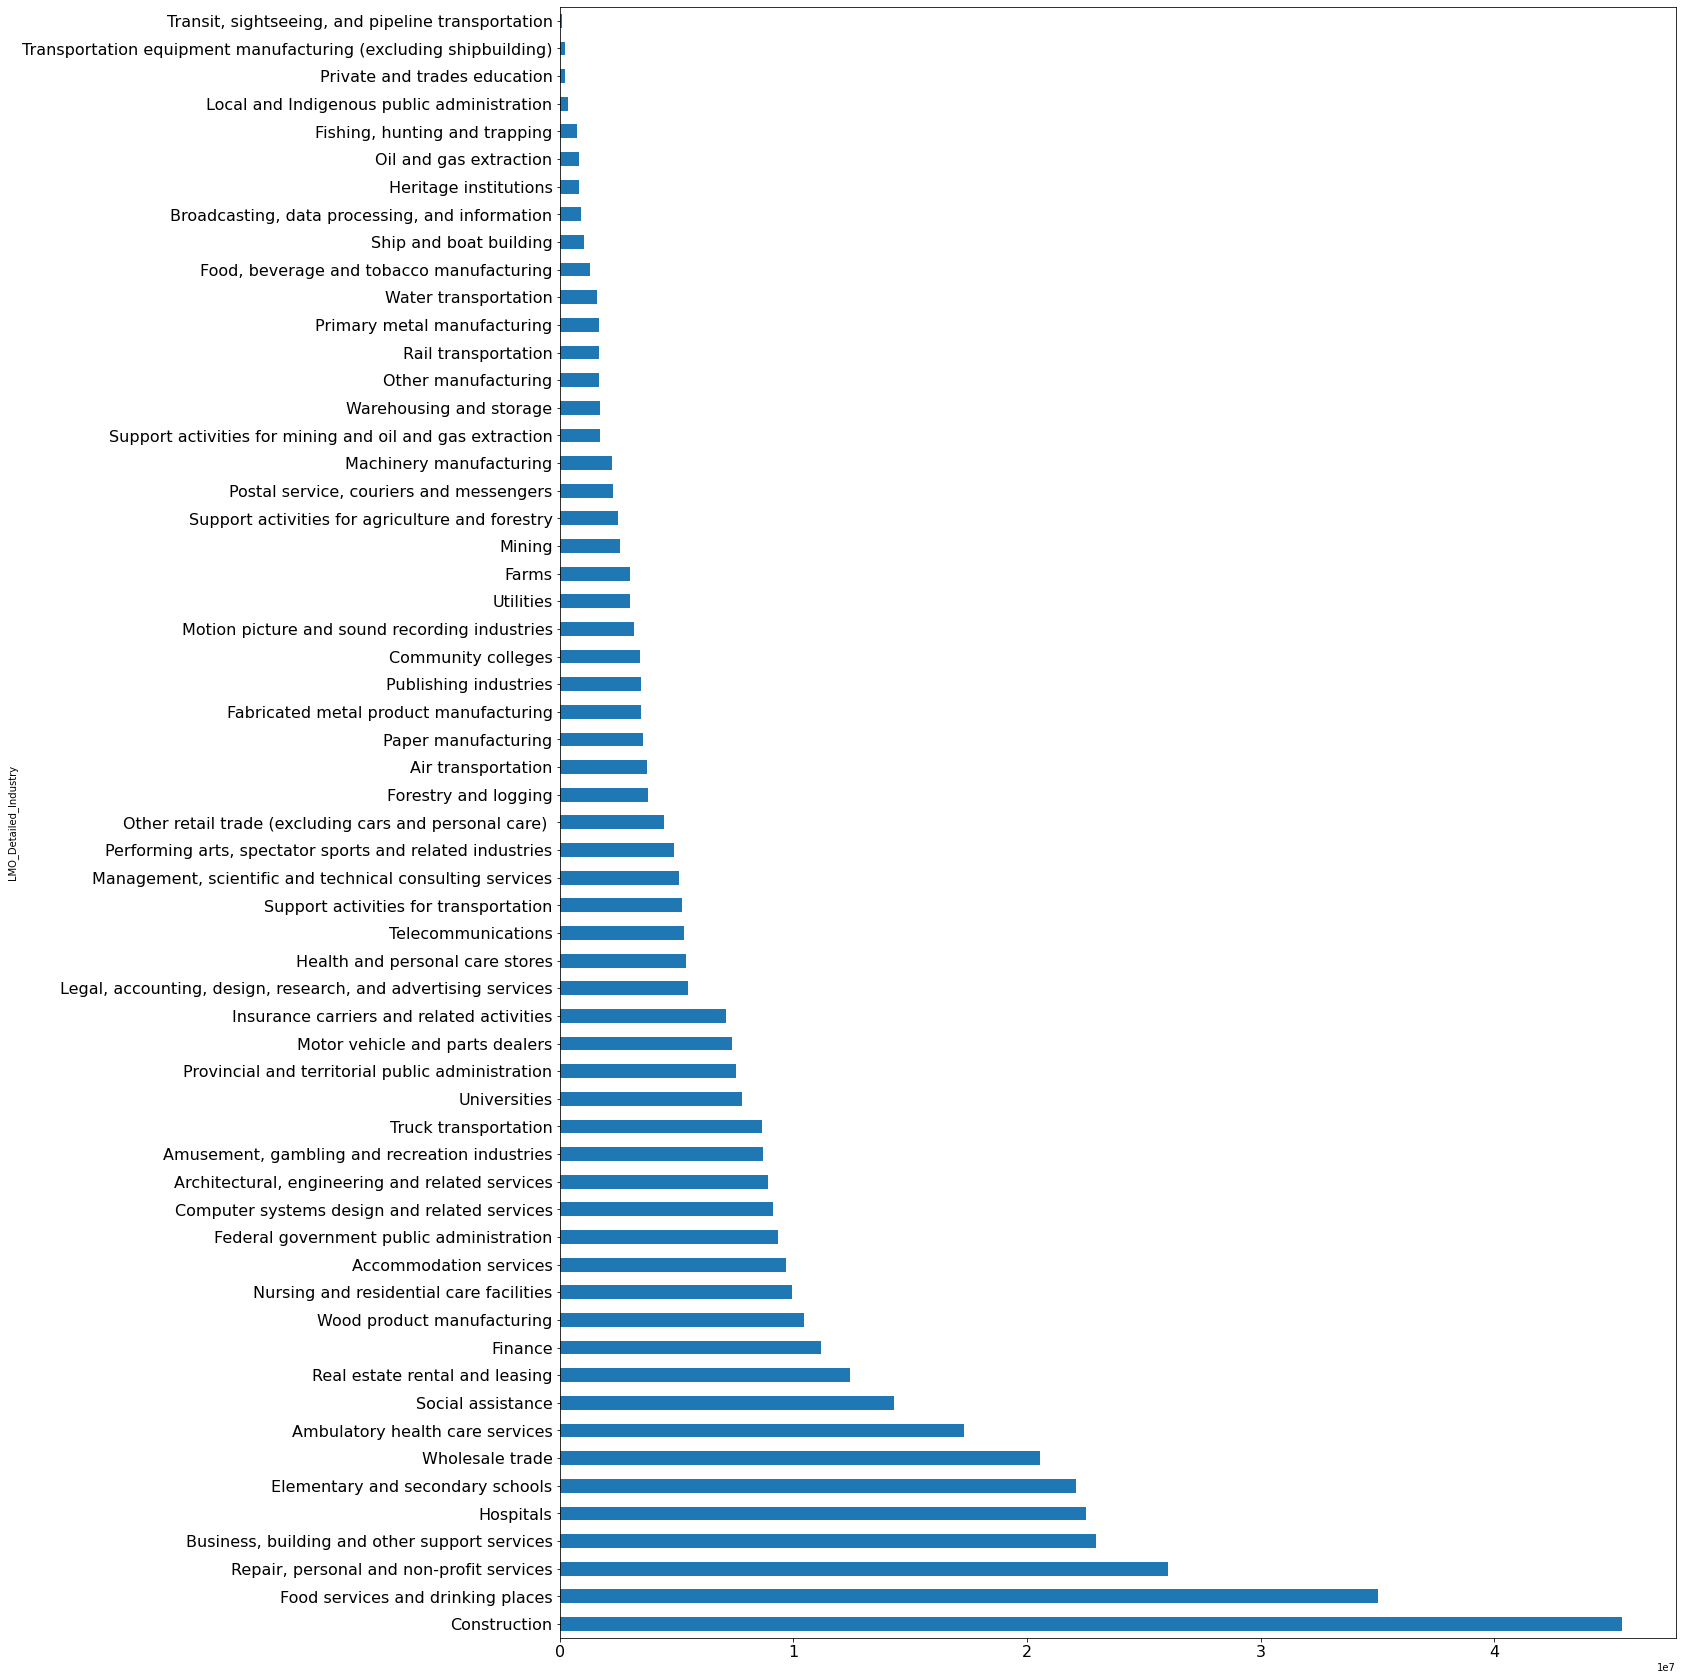

In [104]:
# Plotting the employment summary to visualize our data.
fig, ax = plt.subplots(figsize=(20,30))
employment_summary.plot(kind='barh',fontsize=16) #plot and set the fontsize parameter to 16 to make it visible
plt.show()

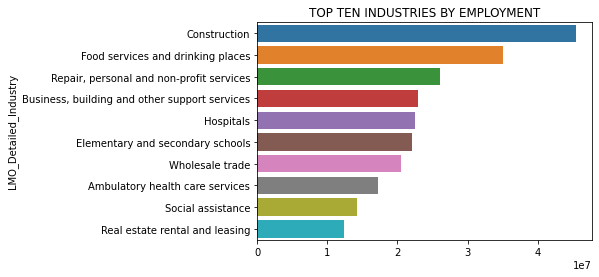

The top 10 industries are: 
 Index(['Construction', 'Food services and drinking places',
       'Repair, personal and non-profit services',
       'Business, building and other support services', 'Hospitals',
       'Elementary and secondary schools', 'Wholesale trade',
       'Ambulatory health care services', 'Social assistance',
       'Real estate rental and leasing'],
      dtype='object', name='LMO_Detailed_Industry')


In [105]:
# Top 10 industries by employment
top_10_industries= employment_summary[0:10] # subset the top 10 industries
sns.barplot(y=top_10_industries.index,x=top_10_industries.values)# plot the index against the values

plt.title('TOP TEN INDUSTRIES BY EMPLOYMENT') 

plt.show()
print('The top 10 industries are: \n', top_10_industries.index)

LMO_Detailed_Industry
Transit, sightseeing, and pipeline transportation                  110500
Transportation equipment manufacturing (excluding shipbuilding)    217000
Private and trades education                                       231250
Local and Indigenous public administration                         363000
Fishing, hunting and trapping                                      741250
Name: Employment, dtype: int64


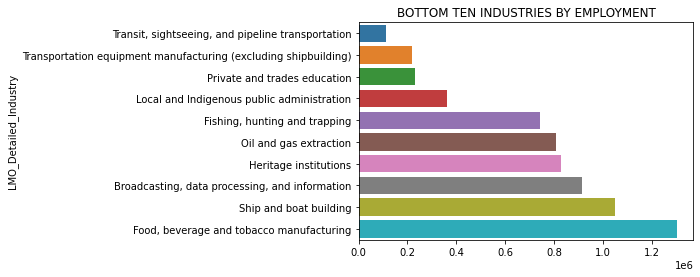

The bottom 10 industries are: 
 Index(['Transit, sightseeing, and pipeline transportation',
       'Transportation equipment manufacturing (excluding shipbuilding)',
       'Private and trades education',
       'Local and Indigenous public administration',
       'Fishing, hunting and trapping', 'Oil and gas extraction',
       'Heritage institutions',
       'Broadcasting, data processing, and information',
       'Ship and boat building', 'Food, beverage and tobacco manufacturing'],
      dtype='object', name='LMO_Detailed_Industry')


In [106]:
# bottom 10 industries by employment
bottom_10_industries=employment_summary.tail(10).sort_values() # subset to get the last 10 and sort from lowerst.
print
print(bottom_10_industries.head())
sns.barplot(y=bottom_10_industries.index,x=bottom_10_industries.values) #plot the output
plt.title('BOTTOM TEN INDUSTRIES BY EMPLOYMENT')
plt.show()
print('The bottom 10 industries are: \n', bottom_10_industries.index)

              Employment
DATE                    
1997-12-31  24866.525424
1998-12-31  24568.502825
1999-12-31  25236.581921
2000-12-31  25606.285311
2001-12-31  25514.830508


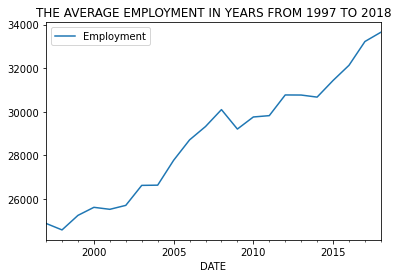

In [107]:
# The average yearly employment from 1997 to 2018
Employment_yearly_average = output_summaries.resample('Y').mean() # Use resample method to group t datetime index column by year and find the mean of it
print(Employment_yearly_average.head()) #print the head of the result 
Employment_yearly_average.plot(title='THE AVERAGE EMPLOYMENT IN YEARS FROM 1997 TO 2018') # plot the results to show the average trend of employment over the years
plt.show()



# QUESTIONS TO ANSWER USING TIME SERIES ANALYSIS

1. How has employment in Construction evolved over time and how does this compares to the total employment across all industries?
2. How has employment in Computer System Design and related services evolved over time?
3. How has the employment of Hospital staff evolved over time?
4. How employment in Finance Industry evolved over time and how it compares to the Real Estate Rental and Leasing.
5. How has employment in Motion Picture and Sound Recording Industries evolved over time?

## How employment in Construction evolved over time and how this compares to the total employment across all industries?
We notice from the analysis that the number of employment in the construction sector experienced a reduction towards the end of the 20th century to 2001. Then employment rate started increasing at a significant rate from 1401500 in 2002 to 2616750 in 2008. It suffered a remarkable dip  between 2008 to 2015. After 2015, Construction employmen numbers have begun to increase at a significant rate.


The total employment across all industries between 1997 to 2018 appears to have similar trend to that of Construction. They both start with a reduction of the number of workers towards the end of the 20th century. Total employment howerver, experienced a steady growth from the 2000 to 2008 unlike COnstruction employment that only experience a higher employment growth rate in the mid 2000 (2004 to 2008). They both surged at 2008 then suffered a significant dip from 2009 to 2015.
As at 2018, they are both steadily adding more workers to their idustries.

In [108]:
construction = output_summaries[output_summaries['LMO_Detailed_Industry'] == 'Construction'] # subset only construction  industry
construction.head()

,LMO_Detailed_Industry,Employment
DATE,,
1997-01-01,Construction,118000
1997-02-01,Construction,120000
1997-03-01,Construction,116750
1997-04-01,Construction,125500
1997-05-01,Construction,123750


            Employment
DATE                  
1997-12-31     1489750
1998-12-31     1424750
1999-12-31     1363500
2000-12-31     1345750
2001-12-31     1347250


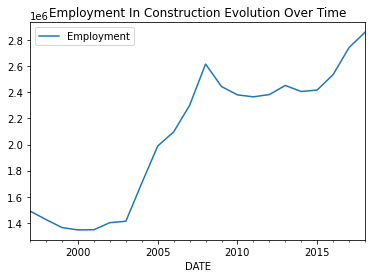

In [109]:
#plot the evolution of Cnstruction employment.
construction= construction.resample('Y').sum()
print(construction.head())
construction.plot(title='Employment In Construction Evolution Over Time')
plt.show()

In [110]:
# How Construction employment evolution compare to the total employment across all industries
total_employment_numbers = output_summaries.resample('Y').sum()
total_employment_numbers.head()

,Employment
DATE,
1997-12-31,17605500
1998-12-31,17394500
1999-12-31,17867500
2000-12-31,18129250
2001-12-31,18064500


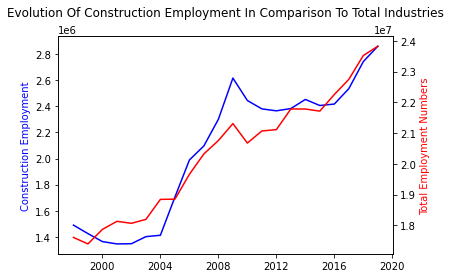

In [111]:
# Combine two line plots on the same figure using the ax.twinx()
fig, ax = plt.subplots()
ax.plot(construction.index, construction.Employment, color='blue') #plot construction and set color to blue to differentiate
ax.set_ylabel('Construction Employment', color='blue')
ax2 = ax.twinx()
ax2.plot(total_employment_numbers.index,total_employment_numbers.Employment, color='red')# plot and set color to red
ax2.set_ylabel('Total Employment Numbers', color='red')
plt.title('Evolution Of Construction Employment In Comparison To Total Industries',pad=20) #set title and pad parameter to 20 to distant the plot from the heading.

plt.show()

## How employment in Computer System Design and related service evolved over time?
Employment in the Computer System Design and related service industry experienced growth from 202250 in 1997 to 412000 in 2001. 
We should keep in mind this period is associated with the rise of internet which was commercialized in 1995. The industry had its steepest decline in 2002 when total employment fell off from 412000 the previous year to 307250. 


            Employment
DATE                  
1997-12-31      202250
1998-12-31      224250
1999-12-31      335250
2000-12-31      382500
2001-12-31      412000


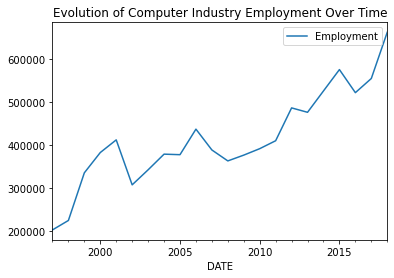

In [112]:
# Subset Computer System Design and related service industry and assigm it to the variable computer_industry.
computer_industry= output_summaries[output_summaries['LMO_Detailed_Industry'] =='Computer systems design and related services']
computer_industry=computer_industry.resample('Y').sum() #resample by year and sum
print(computer_industry.head())
computer_industry.plot(title='Evolution of Computer Industry Employment Over Time') #plot the output
plt.show()

## How has the employment of Hospital staffs evolved over time?
Employment in the hospital industry experienced it's largest decline in 2014 when employment fell from 1249000 the previous year to 1112750. Hospital employment was largely unaffected by the drop in average employment we visualized using the mean of employment across all the industries. Hospital industry recorded a rise in  employment from 1026750 in 2008 to 1122500 in 2010.

            Employment
DATE                  
1997-12-31      800250
1998-12-31      785500
1999-12-31      801500
2000-12-31      841500
2001-12-31      865250
2002-12-31      915750
2003-12-31      884000
2004-12-31      927000
2005-12-31      852250
2006-12-31     1027250
2007-12-31      994000
2008-12-31     1026750
2009-12-31     1089750
2010-12-31     1122500
2011-12-31     1091250
2012-12-31     1203000
2013-12-31     1249000
2014-12-31     1112750
2015-12-31     1164750
2016-12-31     1216250
2017-12-31     1201750
2018-12-31     1346250


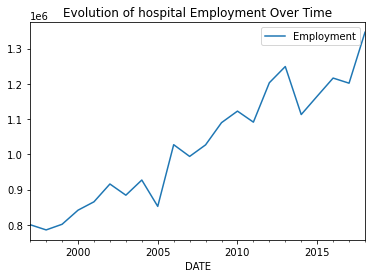

In [113]:
hospital= output_summaries[output_summaries['LMO_Detailed_Industry'] =='Hospitals']
hospital= hospital.resample('Y').sum()
print(hospital.head(25))
hospital.plot(title='Evolution of hospital Employment Over Time')
plt.show()

## How employment in Finance Industry evloved over time and how it compares to the Real Estate Rental and Leasing?
Employment in the finance sector was on a continuous decline from 1997 to 1999. From the early 2000s to mid 2000s, the employment rate was imconsistent.It endured some highs and lows. It peaked at 559750 in 2008. It suffer two major dips, one in 2009 and the other in 2011. The biggest decline was in 2011 when employment reduced from 573500 the previous to 446750.

On the other hand, employment in the real estate, rental and leasing sector, started off with a slow rise in employment from 1997 to 1998. It suffered a reduction in the 2000. It followed up with a steady rise betweeen early to mid 2000 ( 2001 to 2006). It endured a reduction from 590000 in 2008 to 548750 in 2010. It experienced a major decline in 2015, dropping from 578500 to 513250.

Comparing the two trends in employment, it appears that the finance sector has an unstable employment rate. There seems to be an employment turnover where people lose jobs more. Job security does not appear to br guarranteed. The finance sector also seemed to have suffered the worst decline in employment post the 2008 financial crisis compared to the real estate,rental and leasing sector.

In [114]:
finance= output_summaries[output_summaries['LMO_Detailed_Industry'] =='Finance'] #subset the finance industry and assign it to finance variable 

real_estate= output_summaries[output_summaries['LMO_Detailed_Industry'] =='Real estate rental and leasing'] # subset real estate industry and assign real_estate vRIble

print(finance.head())
print(real_estate.head())


           LMO_Detailed_Industry  Employment
DATE                                        
1997-01-01               Finance       44000
1997-02-01               Finance       45750
1997-03-01               Finance       45000
1997-04-01               Finance       48250
1997-05-01               Finance       47250
                     LMO_Detailed_Industry  Employment
DATE                                                  
1997-01-01  Real estate rental and leasing       50750
1997-02-01  Real estate rental and leasing       50500
1997-03-01  Real estate rental and leasing       48000
1997-04-01  Real estate rental and leasing       43500
1997-05-01  Real estate rental and leasing       44000


In [115]:
# join the two data sets and assign it to a variable fin_estate
fin_estate=pd.concat([finance,real_estate])
fin_estate=fin_estate.groupby([fin_estate.index.year,'LMO_Detailed_Industry'])['Employment'].sum().reset_index() #group by the datetime index year attribute and LMO detailed Industry
fin_estate.head()

,DATE,LMO_Detailed_Industry,Employment
0,1997,Finance,541250
1,1997,Real estate rental and leasing,519750
2,1998,Finance,479250
3,1998,Real estate rental and leasing,554500
4,1999,Finance,454750


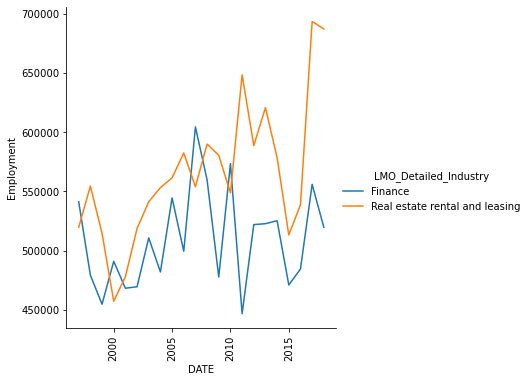

In [116]:
# plot the result with seaborn relational plot 
sns.relplot(x='DATE', y='Employment', hue='LMO_Detailed_Industry', data=fin_estate, kind='line')
plt.xticks(rotation=90) # rotate the x axis so they do not overlap on each other
plt.show()

## How employment in Motion Picture and Sound Recording Industries evolved over time?
Motion Picture and Sound Recording sector experienced steady growth in employment from 116750 in 2001 to 128250 in 2003. It experience a significant reduction in a 2 year span from 163500 in 2010 to 99500 in 2012. Employment peaked at 322000 in 2017 and then dipped to 222000 in 2018.

            Employment
DATE                  
1997-12-31       81000
1998-12-31       73750
1999-12-31      128000
2000-12-31      129000
2001-12-31      116750


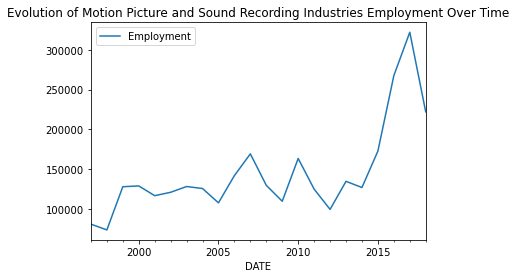

In [117]:
entertainment= output_summaries[output_summaries['LMO_Detailed_Industry'] =='Motion picture and sound recording industries']
entertainment= entertainment.resample('Y').sum()
print(entertainment.head())
entertainment.plot(title='Evolution of Motion Picture and Sound Recording Industries Employment Over Time')
plt.show()